# 决策树应用 - 判断HelloKitty是Girl还是Cat

## 选取特征

- 是否有蝴蝶结
- 是否穿衣服
- 是否高过5个苹果
- 是否有胡子
- 是否圆脸
- 是否有猫耳朵
- 是否两脚走路

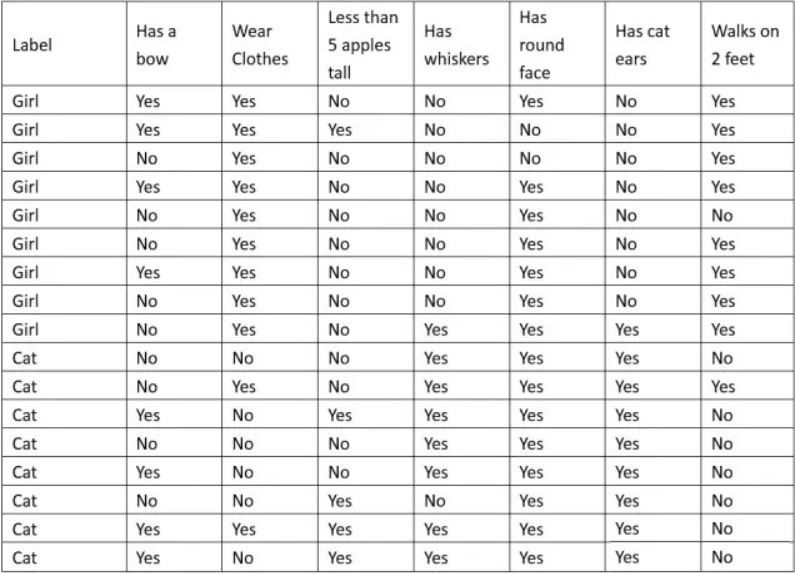

## 用ID3算法构建决策树

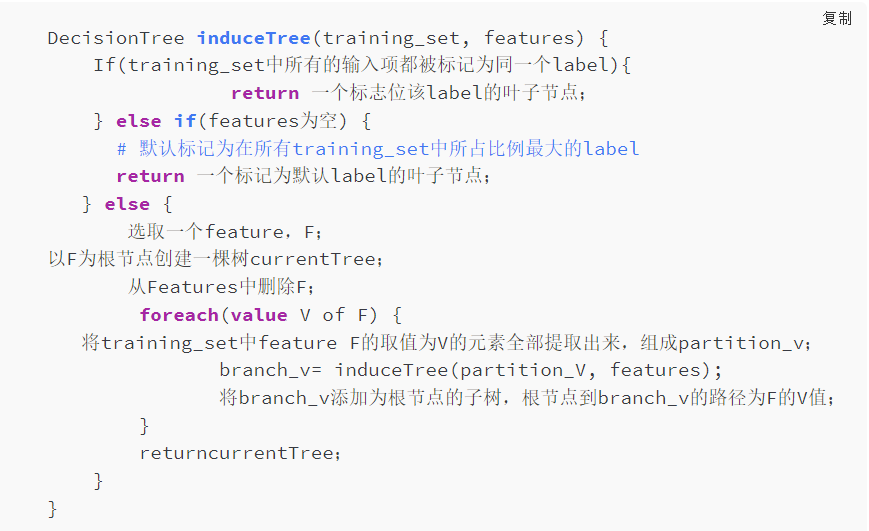

## 后剪枝优化决策树

剪枝是优化决策树的常用手段，大致可以分为两类：
- 先剪枝（局部剪枝）：在构造过程中，，当某个节点满足剪枝条件，则直接停止此分支的构造；
- 后剪枝（全局剪枝）：先构造完成完整的决策树，再通过某些条件遍历树进行剪枝。


本例中决策树已经构造完成，采用后剪枝法进行修剪，即遍历所有节点，将没有区分作用的节点删除：Has round face, Has a bow.
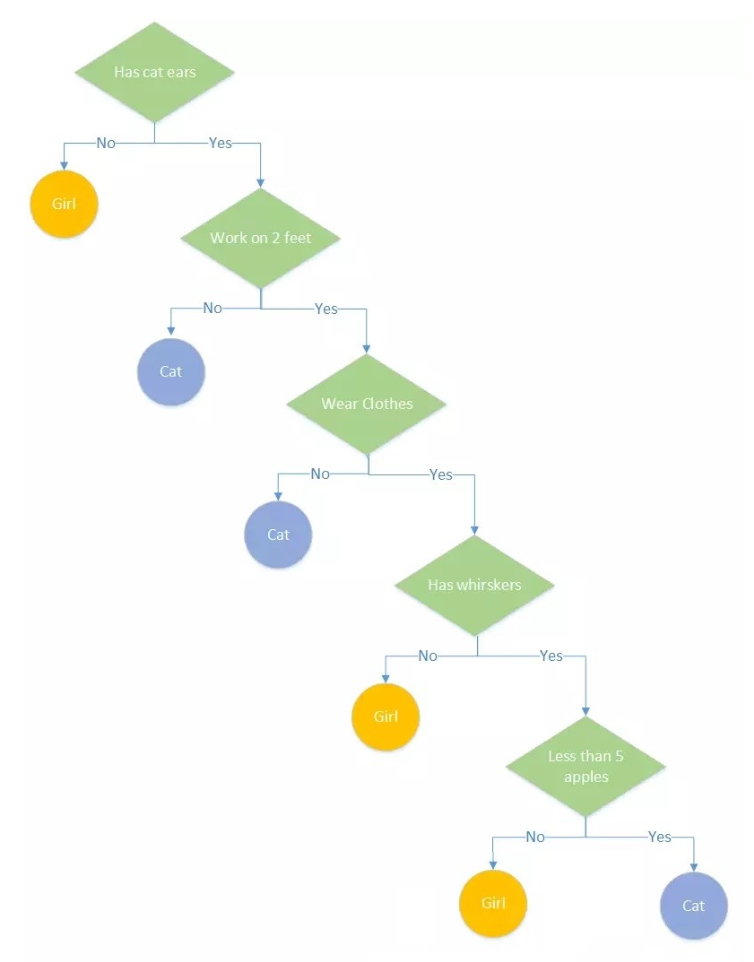

## 代码实现

In [1]:
import numpy as np
from sklearn import tree
from sklearn.model_selection import train_test_split

In [2]:
# 仿真数据：9 girls and 8 cats
# 对应7个featrues, yes 为 1, no 为 0
features = np.array([
    [1, 1, 0, 0, 1, 0, 1],
    [1, 1, 1, 0, 0, 0, 1],
    [0, 1, 0, 0, 0, 0, 1],
    [1, 1, 0, 0, 1, 0, 1],
    [0, 1, 0, 0, 1, 0, 0],
    [0, 1, 0, 0, 1, 0, 1],
    [1, 1, 0, 0, 1, 0, 1],
    [0, 1, 0, 0, 1, 0, 1],
    [0, 1, 0, 1, 1, 1, 1],
    [1, 0, 1, 1, 1, 1, 0],
    [0, 0, 0, 1, 1, 1, 0],
    [1, 0, 1, 1, 1, 1, 0],
    [0, 0, 0, 1, 1, 1, 0],
    [1, 0, 0, 1, 1, 1, 0],
    [0, 0, 1, 0, 1, 1, 0],
    [1, 1, 1, 1, 1, 1, 0],
    [1, 0, 1, 1, 1, 1, 0]
])

# 标签，1表示girl, 0表示cat
labels = np.array([
    [1],
    [1],
    [1],
    [1],
    [1],
    [1],
    [1],
    [1],
    [1],
    [0],
    [0],
    [0],
    [0],
    [0],
    [0],
    [0],
    [0]
])

In [4]:
# 构建数据集
X_train, X_test, y_train, y_test = train_test_split(
    features,
    labels,
    test_size=0.2,
    random_state=0
)

In [8]:
# 训练分类树模型
clf = tree.DecisionTreeClassifier()
clf.fit(X=X_train, y=y_train)

DecisionTreeClassifier()

In [9]:
# 预测
clf.predict(X_test)

array([1, 1, 0, 0])

In [10]:
# 对比预测和实际结果
clf.score(X=X_test, y=y_test)

0.75

In [11]:
# 预测HelloKitty -> Cat
HelloKitty = np.array([[1,1,1,1,1,1,1]])
clf.predict(HelloKitty)

array([0])